In [ ]:
!pip install rdp

  Created wheel for rdp: filename=rdp-0.8-cp36-none-any.whl size=4570 sha256=c413c15173ba853d8a2c08cb0ff676b06ab8c8098972950139def5019efbe46e
  Stored in directory: /root/.cache/pip/wheels/76/e4/02/c738593caece49c63180d093651bec3cd3b02ea3248f076f07
Successfully built rdp


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from rdp import rdp

"""
Path planning Sample Code with RRT with path smoothing
@author: AtsushiSakai(@Atsushi_twi)
"""

import math
import os
import random
import sys
import random

show_animation = True  

In [ ]:
# Desired trajectory
#t = np.linspace(0,1,1000)
#xdes = np.sin(t)
#ydes = np.zeros(len(t))

In [ ]:
path = np.array([[6, 10],
 [6.481265958192566, 9.130878877307962],
 [7.144996030579678, 9.36605078292406],
 [8.019852933892476, 8.88166932299197],
 [8.894709837205275, 8.397287863059882],
 [9.769566740518073, 7.912906403127792],
 [10.542232403512406, 7.278093223342174],
 [11.475577745327461, 6.919113456625249],
 [11.619809284098112, 5.929569489323215],
 [11.68489490579119, 4.931689806270781],
 [11.258713458685929, 4.02705210301977],
 [10.43228492170931, 3.4640104764319255],
 [9.543869457067817, 3.0049702143787584],
 [9.01691990826459, 2.155073648309642],
 [8.01788362467986, 2.1111816891233923],
 [7.599512125662337, 3.0194576872703385],
 [6.704135805175774, 2.574147408125625],
 [5.821063483508917, 3.0433843149284754],
 [5.002621009852871, 3.6179727914190614],
 [4.156229021057754, 4.150533211750358],
 [3.184411030298228, 3.9148007514566685],
 [2.189849989370713, 4.01895609634678],
 [1.6525699593471987, 3.1755521780858245],
 [0.7301228984245971, 2.7894285970974915],
 [0.8460248531868095, 1.7961679380143394],
 [0.3140545077160128, 0.9494049537385261],
 [0, 0]])

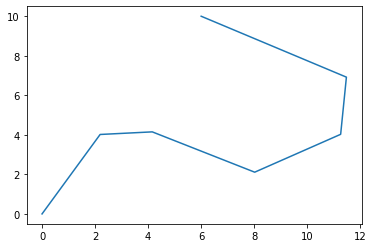

In [ ]:
smooth = rdp(path, epsilon=0.7)
plt.plot(smooth.T[0], smooth.T[1])

In [ ]:
points = smooth

In [ ]:
distance = np.cumsum(np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1)))
distance = np.insert(distance, 0, 0)/distance[-1]
alphas = np.linspace(0, 1, 1000)
t = np.linspace(0, 10, 1000)

interpolator =  interp1d(distance, points, kind='quadratic', fill_value='extrapolate', axis=0)
interpolated_points = interpolator(alphas)

In [ ]:
xdes = interpolated_points.T[0]
ydes = interpolated_points.T[1]
thtdes = np.zeros(len(t))

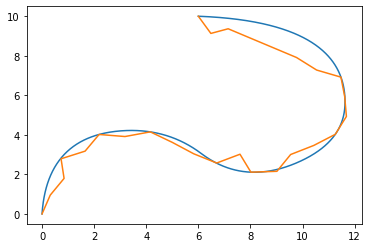

In [ ]:
plt.plot(*interpolated_points.T, '-', label='quadratic');
x, y = smoothedPath.T
plt.plot(x, y, label='original')
plt.show()

In [ ]:
# ICs
x0 = 1
y0 = 1
tht0 = 0

error_x0 = x0 - xdes[0]
error_y0 = y0 - ydes[0]
error_tht0 = tht0 - thtdes[0]

In [ ]:
# Control parameters
timeConst_x = 0.1
timeConst_y = 0.1
timeConst_tht = 1

In [ ]:
# Closed-loop dynamics (analytic) solution : assumes perfect knowledge of desired 
# trajectory derivative
error_x = np.exp(-t / timeConst_x)*error_x0
error_y = np.exp(-t / timeConst_y)*error_y0
error_tht = np.exp(-t / timeConst_tht)*error_tht0

x = error_x + xdes
y = error_y + ydes
tht = error_tht + thtdes

vx = np.diff(x)
vy = np.diff(y)
w = np.diff(tht)

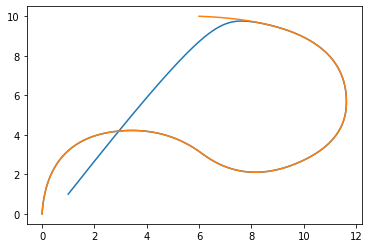

In [ ]:
# Plot the solution
plt.plot(x,y,xdes,ydes)


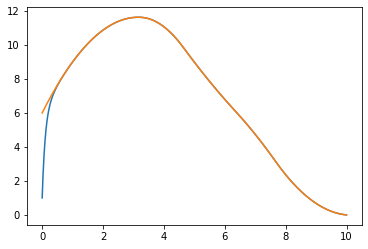

In [ ]:
plt.plot(t,x,t,xdes)

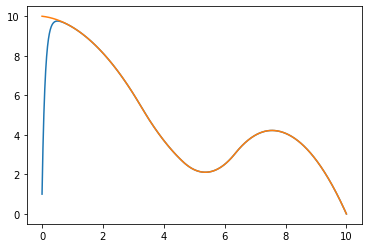

In [ ]:
plt.plot(t,y,t,ydes)